# 비지도학습(Unsupervised Learning)

https://en.wikipedia.org/wiki/Unsupervised_learning

**Unsupervised machine learning** is the machine learning task of inferring a function that describes the structure of **"unlabeled" data (i.e. data that has not been classified or categorized)**. Since the examples given to the learning algorithm are unlabeled, there is no straightforward way to evaluate the accuracy of the structure that is produced by the algorithm—one feature that distinguishes unsupervised learning from supervised learning and reinforcement learning.

비지도학습은 label 즉 답이 없이 feature 집합만으로 학습을 해서 데이터에 내재된 구조를 파악하고자 하는 학습방법이다<br>
label이 없기 때문에 정확도(accuracy)와 같은 직접적인 평가가 어렵다.<br>
주로 데이터를 압축하여 feature의 차원을 줄이거나, 유사한 sample을 묶어서 분류하는 용도로 사용된다.

* Clustering
* PCA(Principal component analysis)
* SVD(Singular value decomposition)
* Autoencoders
* (DBN)Deep Belief Nets

입력 데이터만으로 지식을 추출

In [1]:
# 필요한 환경 세팅
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [2]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


### 1. Scaling에 대한 이해

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [4]:
# 학습 데이터 특성별로 최대값 최소값을 계산
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [5]:
# transform data
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
per-feature maximum before scaling:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


#### Test set 변환
Test set의 최소값과 최대값은 1이 아니다!!! 왜?<br>
Scaler는 항상 training set와 test set에 동일하게 적용되어야 한다!<br>
따라서 test set으로 새로 fit을 해서 쓰지 않고, train set의 fit 결과를 그대로 사용해야 함.<br>
즉, train set의 min, max를 동일하게 test set의 변환에 적용해야 함

In [6]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
per-feature maximum after scaling:
[0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


#### 만일 training data와  test data를 각각 fit해서 scaling을 한다면?
즉, training data와 test data에 각각의 min, max를 적용해서 scaling을 한다면?

#### make_blobs: 적절한 군집을 형성하는 데이터 집합을 생성하는 sklearn 함수
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

Generate isotropic Gaussian blobs for clustering.

*n_samples* : int or array-like, optional (default=100) <br>
If int, it is the total number of points equally divided among clusters. If array-like, each element of the sequence indicates the number of samples per cluster.

*n_features* : int, optional (default=2) <br>
The number of features for each sample.

*centers* 군집의 수: int or array of shape [n_centers, n_features], optional <br>
(default=None) The number of centers to generate, or the fixed center locations. If n_samples is an int and centers is None, 3 centers are generated. If n_samples is array-like, centers must be either None or an array of length equal to the length of n_samples.

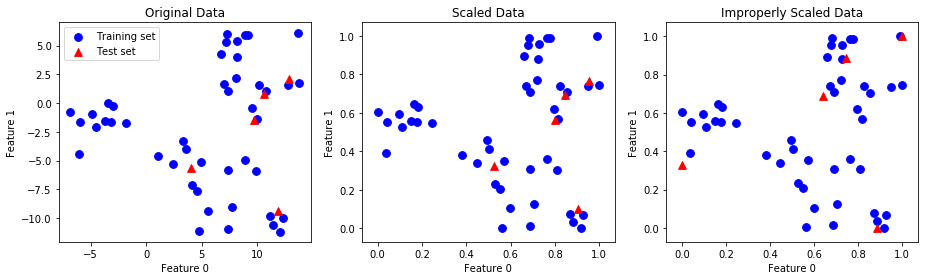

In [7]:
from sklearn.datasets import make_blobs

# 5개의 중심점을 갖는 50개의 데이터 셋을 생성
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1) #5개의 test 집합으로 분리

colors = ['blue', 'red']

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=colors[0], label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=colors[1], label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=colors[0], label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=colors[1], label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
# test set에 대해 새로 fit을 하고 변환
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=colors[1], label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
fig.tight_layout()

#### fit과 transform을 동시에 수행
train set은 보통 fit과 transform을 순차적으로 모두 하므로, 이를 동시에 하는 fit_transform을 쓰는 것이 좋은 습관

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X_train).transform(X_train)
# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X_train)

#### Preprocessing의 효과: supervised learning

In [9]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100, gamma='auto')
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


In [10]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


#### StandardScaler의 적용결과
모든 scaler가 동일하게 fit, transform 메소드를 제공하므로 사용 및 교체가 쉬움

In [11]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


## 2. Dimensionality Reduction(차원 축소) and Feature Extraction

**Feature selection** (https://en.wikipedia.org/wiki/Feature_selection) 

In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for four reasons:

* simplification of models to make them easier to interpret by researchers/users,
* shorter training times,
* to avoid the curse of dimensionality,
* enhanced generalization by reducing overfitting (formally, reduction of variance)

의미가 없거나 결과에 영향을 미치지 않는 feature 삭제

**Feature extraction**: (https://en.wikipedia.org/wiki/Feature_extraction)

기존의 feature들의 선형결합으로 새로운 feature를 생성하여 압축

In machine learning, pattern recognition and in image processing, feature extraction starts from an initial set of measured data and builds derived values (features) intended to be informative and non-redundant, facilitating the subsequent learning and generalization steps, and in some cases leading to better human interpretations. Feature extraction is related to dimensionality reduction.

* PCA(Principal component analysis)
* LSA(Latent semantic analysis)
* SVD(Singular-value decomposition)

### PCA(Principal component analysis, 주성분분석)

https://en.wikipedia.org/wiki/Principal_component_analysis

**Principal component analysis (PCA)** is a statistical procedure that uses an *orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables* called principal components. If there are {\displaystyle n} n observations with {\displaystyle p} p variables, then the number of distinct principal components is {\displaystyle \min(n-1,p)} {\displaystyle \min(n-1,p)}. This transformation is defined in such a way that the first principal component has the *largest possible variance* (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

**PCA(주성분분석)**: 데이터의 분산을 최대한 보존하는 새로운 축을 찾아 변환함으로써 차원을 축소

https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

![](g1.png)
![](pca1.gif)
![](pca2.gif)

#### PCA를  cancer dataset에 적용
먼저 각 특성 별로 malignant와 benign의 분포를 살펴 봄<br>
각 특성 별로 histogram을 malignant와 benign에 대해 그렸을 때, 두 histogram이 많이 겹칠수록 쓸모 없는 특성이 되고, 구분이 잘 될수록 유용한 특성이 될 수 있음<br>
그러나 이 그래프 만으로는 특성 간의 상호작용이나, 상호작용이 label에 미치는 영향을 알기 어려움

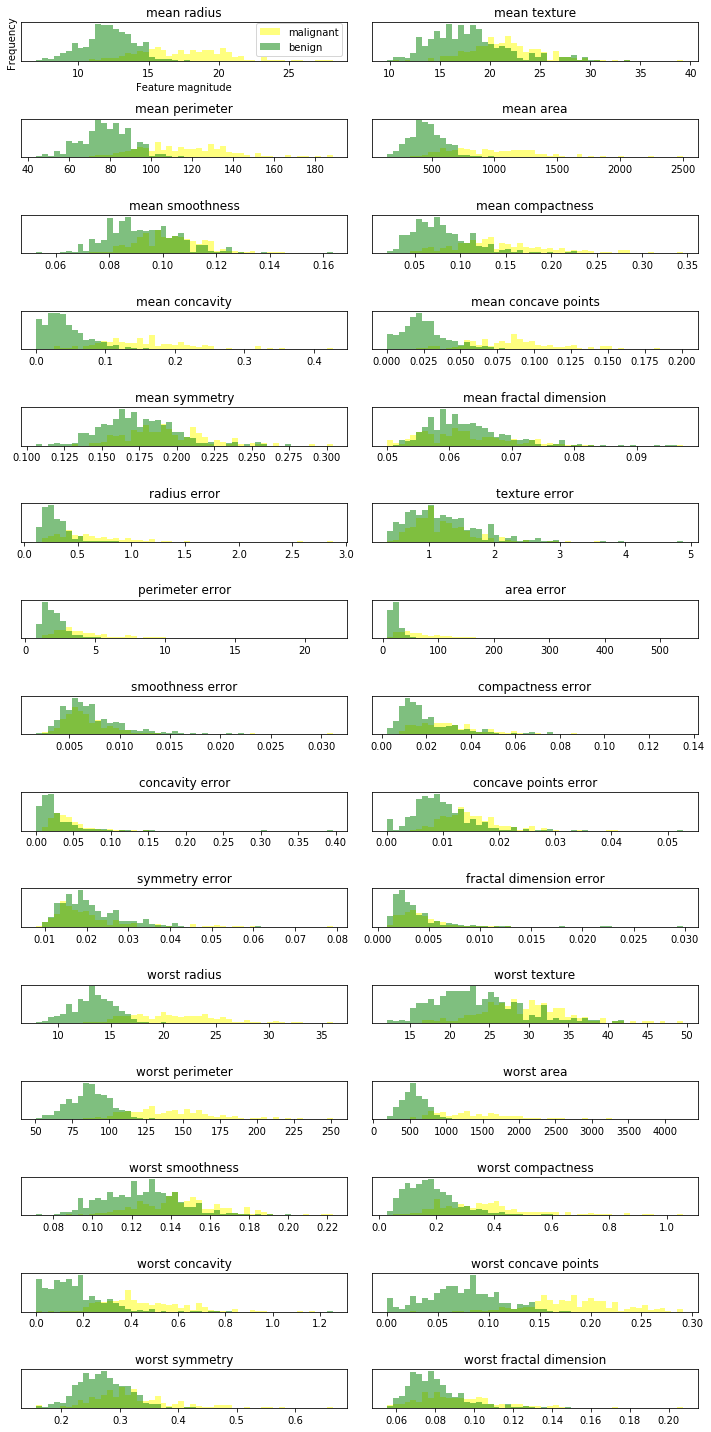

In [12]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
colors = ['yellow', 'green']

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=colors[0], alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=colors[1], alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

분석을 시작하기 전에 scaling을 수행

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

#### sklearn PCA 
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.<br>
n_components로 축소할 차원을 지정<br>
2로 할 경우, cancer data의 원래 X feature 수인 30에서 2로 축소됨

In [14]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

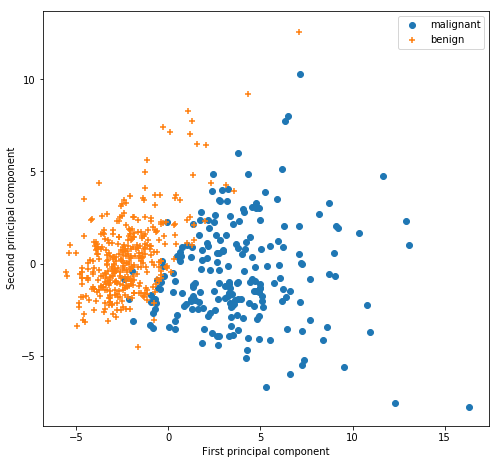

In [15]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))

plt.scatter(X_pca[cancer.target == 0, 0], X_pca[cancer.target == 0, 1], marker='o')
plt.scatter(X_pca[cancer.target == 1, 0], X_pca[cancer.target == 1, 1], marker='+')

plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

#### PCA 결과
축소된 두 개의 축으로 label - class가 비교적 잘 분리되고 있음<br>
malignant가 더 넓게 분포하고 있는 것도 볼 수 있음<br>
explained_variance_ratio_, components_ 를 이용해 축소된 축이 설명한 분산의 비율과 원래 feature들과의 연관성을 볼 수 있음

In [16]:
# 각 축이 설명하는 분산의 비율
print("explained variance ratio: {}".format(pca.explained_variance_ratio_))
# 두개 축의 합
print("sum of explained variance ratio: {}".format(pca.explained_variance_ratio_.sum()))

explained variance ratio: [0.443 0.19 ]
sum of explained variance ratio: 0.6324320765155951


In [17]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [18]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


## 3. 군집 분석 (Clustering)

https://ko.wikipedia.org/wiki/%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0_%EB%B6%84%EC%84%9D

클러스터 분석(Cluster analysis)이란 주어진 데이터들의 특성을 고려해 데이터 집단(클러스터)을 정의하고 데이터 집단의 대표할 수 있는 대표점을 찾는 것으로 데이터 마이닝의 한 방법이다. 클러스터란 비슷한 특성을 가진 데이터들의 집단이다. 반대로 데이터의 특성이 다르면 다른 클러스터에 속해야 한다.

#### k-Means clustering
https://ko.wikipedia.org/wiki/K-%ED%8F%89%EA%B7%A0_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98

k-평균 알고리즘(K-means algorithm)은 주어진 데이터를 k개의 클러스터로 묶는 알고리즘으로, 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 동작한다. 이 알고리즘은 자율 학습의 일종으로, 레이블이 달려 있지 않은 입력 데이터에 레이블을 달아주는 역할을 수행한다. 이 알고리즘은 EM 알고리즘을 이용한 클러스터링과 비슷한 구조를 가지고 있다.

#### sklearn KMeans
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# default 값을 이용해서 데이터를 생성, 3개의 중심점을 갖는 100개의 data (feature 수는 2) 생성
X, _ = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3) #세 개의 군집으로 분류
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [21]:
print(kmeans.predict(X)) #학습된 규칙을 이용하여 분류 - 새로운 데이터에 대해서도 분류가 가능
# 각 군집의 중심점과의 거리를 계산해서 가장 가까운 중심점을 가진 군집으로 분류

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


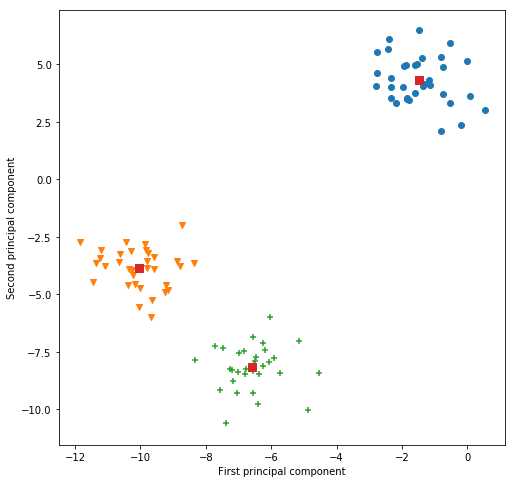

In [22]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
markers = ['o', 'v', '+', '<', '>']

y = kmeans.labels_ # keans가 각 데이터에 대해 분류한 군집

#자신이 속한 군집에 따라 다른 모양으로 그래프에 그리기
for label in set(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], marker=markers[label])

# 각 군집의 중심점 그리기 - 네모
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='s', s=50)

plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

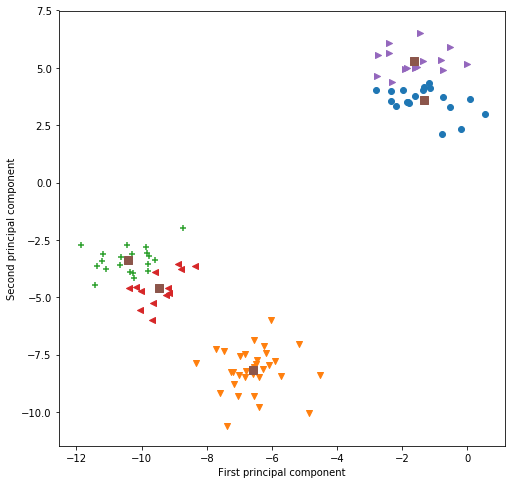

In [23]:
# 5개의 군집으로 분류
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y = kmeans.labels_

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
markers = ['o', 'v', '+', '<', '>']

for label in set(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], marker=markers[label])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='s', s=50)

plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

#### 계층적 군집분석 (Hierarchical Clustering and Dendrograms)

계층적 군집분석: K-means와 달리 군집의 수를 지정할 필요가 없음<br>
가까운 점들부터 순서대로 군집을 형성<br>

덴드로그램: 개체들이 결합되는 순서를 나타내는 트리형태의 구조<br>
적절한 점에서 끊어 군집을 형성할 수 있음

##### sklearn 지원함수

*ward*: 군집 내의 분산을 가장 작게 증가시키는 두 군집을 합치고 그 결과를 반환.<br>
*average*: 군집 간 점들 사이의 평균거리가 가장 짧은 두 군집을 합치고 그 결과를 반환.<br>
*complete*: 군집 간 점들 사이의 최대 거리가 가장 짧은 두 군집을 합치고 그 결과를 반환.<br>
*dendrogram*: 군집화된 결과를 받아 트리 모양을 출력. <br>
1. 군집으로 합쳐진 순서를 보여준다.
2. 가지의 위아래 길이는 각 군집이 얼마나 멀리 떨어져 있는지 보여준다.

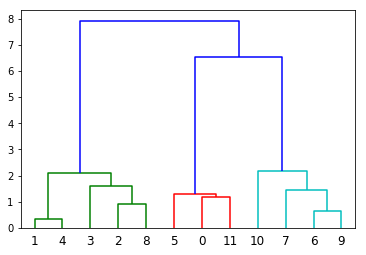

In [24]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12) #12개의 data set만 생성

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
plt.figure()
dn = dendrogram(linkage_array)
plt.show()

Text(0, 0.5, 'Cluster distance')

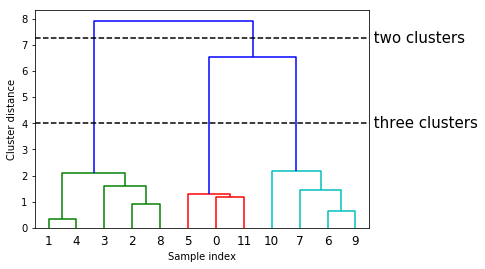

In [25]:
dn = dendrogram(linkage_array)

# 결과에 추가적인 정보를 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

위 그림에서 세 개의 군집으로 분류된 가지의 길이가 가장 긴 것을 볼 수 있는데, 이는 세 개로 분류하는 것이 가장 바람직한 것을 의미한다. 

### PCA 결과에 군집분석 적용
앞서 breast cancer data에서 PCA를 이용하여 2개의 feature로 압축한 결과를 이용하여 군집분석 시행

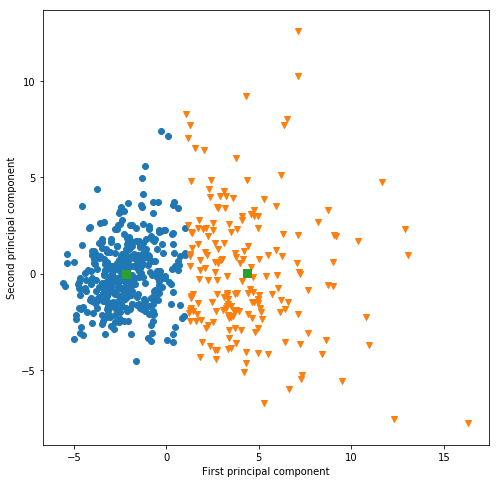

In [29]:
# 2개의 군집으로 분류
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca)
y = kmeans.labels_

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
markers = ['o', 'v', '+', '<', '>']

for label in set(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], marker=markers[label])

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='s', s=50)

plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

#### 실제 결과와 비교
label에 대한 정보가 전혀 없음에도 불구하고 유사한 결과가 나온다는 것이 놀라운 점

Text(0, 0.5, 'Second principal component')

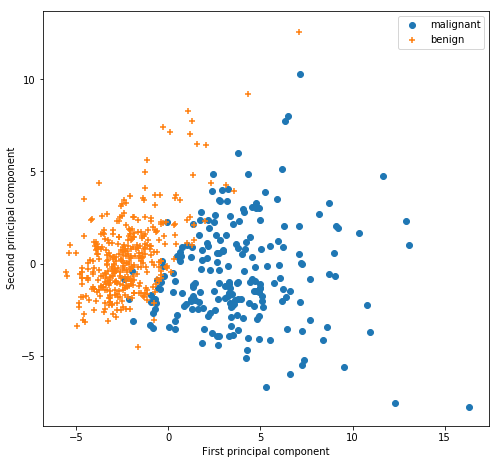

In [30]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))

plt.scatter(X_pca[cancer.target == 0, 0], X_pca[cancer.target == 0, 1], marker='o')
plt.scatter(X_pca[cancer.target == 1, 0], X_pca[cancer.target == 1, 1], marker='+')

plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()